<a href="https://colab.research.google.com/github/Cerino-rigo/EC3002C.602-2023/blob/main/manejo_datos_faltantes_categoricos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importar los datos desde drive

In [ ]:
import pandas as pd

# Lista de archivos CSV
files = ["/content/drive/MyDrive/Nose_BD/aire_neutral_2.csv",
         #"/content/drive/MyDrive/Nose_BD/aire_neutral_1.csv",
         "/content/drive/MyDrive/Nose_BD/aire_neutral.csv",
         #"/content/drive/MyDrive/Nose_BD/aire_mezclado_3.csv",
         "/content/drive/MyDrive/Nose_BD/cafe_espresso_2.csv",
         "/content/drive/MyDrive/Nose_BD/cafe_espresso_4.csv",
         "/content/drive/MyDrive/Nose_BD/cafe_espresso_5.csv",
         #"/content/drive/MyDrive/Nose_BD/cafe_espresso_3.csv",
         #"/content/drive/MyDrive/Nose_BD/manzanas.csv",
         "/content/drive/MyDrive/Nose_BD/manzanas_2.csv",
         "/content/drive/MyDrive/Nose_BD/manzanas_4.csv",
         "/content/drive/MyDrive/Nose_BD/alcohol.csv"]

df = pd.concat(map(pd.read_csv, files), ignore_index=True)
df.shape


(28273, 5)

## Almacenar la nueva BD en drive

In [ ]:
df.to_csv('/content/drive/MyDrive/Nose_BD/BD_join_all.csv', index=False)


## No es necesario ejecutar, son pruebas

In [ ]:
import numpy as np
import pandas as pd

def cargar_datos(filename):
    """Carga datos desde un archivo CSV y retorna como un DataFrame, omitiendo la columna 'label'."""
    df = pd.read_csv(filename)
    # Omitir la columna 'label'
    df = df.drop(columns=['Label'])
    return df

def calcular_estadisticas(df):
    """Calcula la media y la varianza de cada columna en el DataFrame."""
    medias = df.mean()
    varianzas = df.var()
    estadisticas = {
        'media_temperatura': medias['Temperatura'],
        'varianza_temperatura': varianzas['Temperatura'],
        'media_humedad': medias['Humedad'],
        'varianza_humedad': varianzas['Humedad'],
        'media_resistencia_gas': medias['ResistenciaGas'],
        'varianza_resistencia_gas': varianzas['ResistenciaGas']
    }
    return estadisticas

# Archivos CSV para cada clase
archivos_clases = {
    'Cafe': "/content/drive/MyDrive/Nose_BD/CAFE.csv",
    'Manzanas': "/content/drive/MyDrive/Nose_BD/MANZANA.csv",
    'Aire': "/content/drive/MyDrive/Nose_BD/AIRE.csv"
}


# Calcular estadísticas para cada clase
estadisticas_clases = {}

for clase, archivo in archivos_clases.items():
    df = cargar_datos(archivo)
    estadisticas_clases[clase] = calcular_estadisticas(df)

# Mostrar resultados
for clase, stats in estadisticas_clases.items():
    print(f"{clase}:")
    print(f"  Media Temperatura = {stats['media_temperatura']:.2f}, Varianza Temperatura = {stats['varianza_temperatura']:.2f}")
    print(f"  Media Humedad = {stats['media_humedad']:.2f}, Varianza Humedad = {stats['varianza_humedad']:.2f}")
    print(f"  Media Resistencia al Gas = {stats['media_resistencia_gas']:.2f}, Varianza Resistencia al Gas = {stats['varianza_resistencia_gas']:.2f}")
    print()



Cafe:
  Media Temperatura = 31.49, Varianza Temperatura = 1.13
  Media Humedad = 32.51, Varianza Humedad = 14.66
  Media Resistencia al Gas = 44.14, Varianza Resistencia al Gas = 37.46

Manzanas:
  Media Temperatura = 31.76, Varianza Temperatura = 0.17
  Media Humedad = 51.93, Varianza Humedad = 6.08
  Media Resistencia al Gas = 89.50, Varianza Resistencia al Gas = 373.59

Aire:
  Media Temperatura = 29.48, Varianza Temperatura = 0.72
  Media Humedad = 41.32, Varianza Humedad = 10.61
  Media Resistencia al Gas = 146.59, Varianza Resistencia al Gas = 315.81



## No es necesario ejecutar, son pruebas

In [ ]:
import numpy as np
import pandas as pd

def cargar_datos(filename):
    """Carga datos desde un archivo CSV y retorna como un DataFrame, omitiendo la columna 'label'."""
    df = pd.read_csv(filename)
    # Omitir la columna 'label'
    df = df.drop(columns=['Label'])
    return df

def calcular_estadisticas(df):
    """Calcula la media y la varianza de cada columna en el DataFrame."""
    medias = df.mean()
    varianzas = df.var()
    estadisticas = {
        'media_temperatura': medias['Temperatura'],
        'varianza_temperatura': varianzas['Temperatura'],
        'media_humedad': medias['Humedad'],
        'varianza_humedad': varianzas['Humedad'],
        'media_resistencia_gas': medias['ResistenciaGas'],
        'varianza_resistencia_gas': varianzas['ResistenciaGas']
    }
    return estadisticas

def calcular_probabilidad(x, media, covarianza):
    """Calcula la probabilidad de un dato dado una media y una covarianza."""
    k = len(x)
    x_m = np.array(x) - np.array(media)
    probabilidad = (1.0 / (np.sqrt((2 * np.pi)**k * np.linalg.det(covarianza)))) * \
                   np.exp(-0.5 * np.dot(np.dot(x_m.T, np.linalg.inv(covarianza)), x_m))
    return probabilidad

def calcular_probabilidades_dato(estadisticas, dato_entrada):
    """Calcula la probabilidad de que un dato pertenezca a cada clase."""
    probabilidades = {}
    for clase, stats in estadisticas.items():
        media = [stats['media_temperatura'], stats['media_humedad'], stats['media_resistencia_gas']]
        varianzas = [stats['varianza_temperatura'], stats['varianza_humedad'], stats['varianza_resistencia_gas']]

        # Crear matriz de covarianza diagonal
        covarianza = np.diag(varianzas)

        probabilidad = calcular_probabilidad(dato_entrada, media, covarianza)
        probabilidades[clase] = probabilidad

    return probabilidades

# Archivos CSV para cada clase
archivos_clases = {
    'Cafe': "/content/drive/MyDrive/Nose_BD/CAFE.csv",
    'Manzanas': "/content/drive/MyDrive/Nose_BD/MANZANA.csv",
    'Aire': "/content/drive/MyDrive/Nose_BD/AIRE.csv"
}


# Calcular estadísticas para cada clase
estadisticas_clases = {}

for clase, archivo in archivos_clases.items():
    df = cargar_datos(archivo)
    estadisticas_clases[clase] = calcular_estadisticas(df)

# Dato de entrada: temperatura, humedad, resistencia al gas
dato_entrada = [30.7, 36.36, 44.47]

# Calcular probabilidades
probabilidades = calcular_probabilidades_dato(estadisticas_clases, dato_entrada)

# Mostrar resultados
for clase, probabilidad in probabilidades.items():
    print(f"Probabilidad de pertenecer a {clase}: {probabilidad:.6f}")


Probabilidad de pertenecer a Cafe: 0.116561
Probabilidad de pertenecer a Manzanas: 0.000000
Probabilidad de pertenecer a Aire: 0.000000


## No es necesario ejecutar, son pruebas

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

def cargar_datos(filename):
    """Carga datos desde un archivo CSV y retorna como un DataFrame, omitiendo la columna 'Label'."""
    df = pd.read_csv(filename)
    # Omitir la columna 'Label'
    df = df.drop(columns=['Label'])
    return df

def escalar_datos(df):
    """Escala los datos usando StandardScaler."""
    scaler = StandardScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
    return df_scaled, scaler

def calcular_estadisticas(df):
    """Calcula la media y la varianza de cada columna en el DataFrame."""
    medias = df.mean()
    varianzas = df.var()
    estadisticas = {
        'media_temperatura': medias['Temperatura'],
        'varianza_temperatura': varianzas['Temperatura'],
        'media_humedad': medias['Humedad'],
        'varianza_humedad': varianzas['Humedad'],
        'media_resistencia_gas': medias['ResistenciaGas'],
        'varianza_resistencia_gas': varianzas['ResistenciaGas']
    }
    return estadisticas

def calcular_probabilidad(x, media, covarianza):
    """Calcula la probabilidad de un dato dado una media y una covarianza."""
    k = len(x)
    x_m = np.array(x) - np.array(media)
    cov_inv = np.linalg.inv(covarianza)
    det_cov = np.linalg.det(covarianza)

    # Calculo de la constante de normalización
    normalizacion = 1.0 / (np.sqrt((2 * np.pi)**k * det_cov))

    # Exponente de la función de probabilidad
    exponente = -0.5 * np.dot(np.dot(x_m.T, cov_inv), x_m)

    probabilidad = normalizacion * np.exp(exponente)
    return probabilidad

def calcular_probabilidades_dato(estadisticas, dato_entrada):
    """Calcula la probabilidad de que un dato pertenezca a cada clase."""
    probabilidades = {}
    for clase, stats in estadisticas.items():
        media = [stats['media_temperatura'], stats['media_humedad'], stats['media_resistencia_gas']]
        varianzas = [stats['varianza_temperatura'], stats['varianza_humedad'], stats['varianza_resistencia_gas']]

        # Crear matriz de covarianza diagonal
        covarianza = np.diag(varianzas)

        probabilidad = calcular_probabilidad(dato_entrada, media, covarianza)
        probabilidades[clase] = probabilidad

    return probabilidades

# Archivos CSV para cada clase
archivos_clases = {
    'Cafe': "/content/drive/MyDrive/Nose_BD/CAFE.csv",
    'Manzanas': "/content/drive/MyDrive/Nose_BD/MANZANA.csv",
    'Aire': "/content/drive/MyDrive/Nose_BD/AIRE.csv"
}

# Calcular estadísticas y escaladores para cada clase
estadisticas_clases = {}

for clase, archivo in archivos_clases.items():
    df = cargar_datos(archivo)
    df_scaled, scaler = escalar_datos(df)
    estadisticas_clases[clase] = calcular_estadisticas(df_scaled)

# Dato de entrada: temperatura, humedad, resistencia al gas
dato_entrada = [30.7, 36.36, 44.47]

# Calcular probabilidades
probabilidades = calcular_probabilidades_dato(estadisticas_clases, dato_entrada)

# Mostrar resultados
for clase, probabilidad in probabilidades.items():
    print(f"Probabilidad de pertenecer a {clase}: {probabilidad:.6f}")


Probabilidad de pertenecer a Cafe: 0.000000
Probabilidad de pertenecer a Manzanas: 0.000000
Probabilidad de pertenecer a Aire: 0.000000


## Verificar distribución de los datos

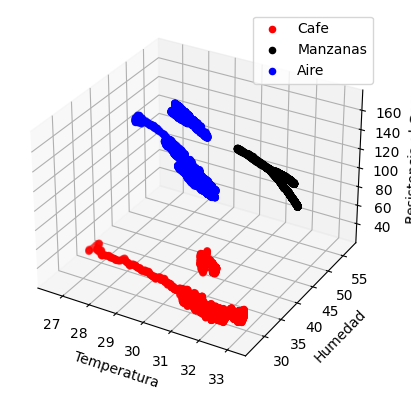

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def cargar_datos(filename):
    """Carga datos desde un archivo CSV y retorna como un DataFrame, omitiendo la columna 'label'."""
    df = pd.read_csv(filename)
    # Omitir la columna 'label'
    df = df.drop(columns=['Label'])
    return df

def plot_3d_scatter(clases):
    """Crea una gráfica 3D de dispersión de las clases."""
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    colors = {'Cafe': 'r', 'Manzanas': 'k', 'Aire': 'b'}

    for clase, df in clases.items():
        ax.scatter(df['Temperatura'], df['Humedad'], df['ResistenciaGas'], c=colors[clase], label=clase)

    ax.set_xlabel('Temperatura')
    ax.set_ylabel('Humedad')
    ax.set_zlabel('Resistencia al Gas')
    ax.legend()

    plt.show()

# Archivos CSV para cada clase
archivos_clases = {
    'Cafe': "/content/drive/MyDrive/Nose_BD/CAFE.csv",
    'Manzanas': "/content/drive/MyDrive/Nose_BD/MANZANA.csv",
    'Aire': "/content/drive/MyDrive/Nose_BD/AIRE.csv"
}

# Cargar datos para cada clase
clases = {}

for clase, archivo in archivos_clases.items():
    clases[clase] = cargar_datos(archivo)

# Graficar dispersión 3D
plot_3d_scatter(clases)


In [ ]:
pip install plotly


## Verificar distribución de los datos de manera dinámica con Plotly

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px

def cargar_datos(filename):
    """Carga datos desde un archivo CSV y retorna como un DataFrame, omitiendo la columna 'label'."""
    df = pd.read_csv(filename)
    # Omitir la columna 'label'
    df = df.drop(columns=['Label'])
    return df

def plot_3d_scatter_interactive(clases):
    """Crea una gráfica 3D de dispersión interactiva de las clases."""
    data_frames = []
    labels = []

    for clase, df in clases.items():
        data_frames.append(df)
        labels.extend([clase] * len(df))

    combined_df = pd.concat(data_frames)
    combined_df['Clase'] = labels

    fig = px.scatter_3d(combined_df, x='Temperatura', y='Humedad', z='ResistenciaGas', color='Clase')
    fig.update_layout(scene=dict(
                        xaxis_title='Temperatura',
                        yaxis_title='Humedad',
                        zaxis_title='Resistencia al Gas'),
                      title='Dispersión 3D de las Clases')
    fig.show()

# Archivos CSV para cada clase
archivos_clases = {
    'Cafe': "/content/drive/MyDrive/Nose_BD/CAFE.csv",
    'Manzanas': "/content/drive/MyDrive/Nose_BD/MANZANA.csv",
    'Aire': "/content/drive/MyDrive/Nose_BD/AIRE.csv"
}

# Cargar datos para cada clase
clases = {}

for clase, archivo in archivos_clases.items():
    clases[clase] = cargar_datos(archivo)

# Graficar dispersión 3D interactiva
plot_3d_scatter_interactive(clases)


## Importar la BD concatenada

In [ ]:
# Lectura
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/Nose_BD/BD_join_all.csv")


In [ ]:
# Mostrar información básica
print(data.info())
print(data.describe())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28273 entries, 0 to 28272
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Label           28273 non-null  object 
 1   Temperatura     28273 non-null  float64
 2   Humedad         28273 non-null  float64
 3   Presion         28273 non-null  float64
 4   ResistenciaGas  28273 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.1+ MB
None
        Temperatura       Humedad       Presion  ResistenciaGas
count  28273.000000  28273.000000  2.827300e+04    28273.000000
mean      31.539199     39.904627  4.294953e+07       72.093352
std        1.606683      8.382003  3.360706e-01       54.485412
min       26.540000     26.670000  4.294953e+07        5.680000
25%       30.630000     33.060000  4.294953e+07        7.370000
50%       31.740000     36.910000  4.294953e+07       63.520000
75%       33.060000     48.590000  4.294953e+07      120.500000
max     

In [ ]:
# Verificar valores faltantes
print(data.isnull().sum())

# Mostrar las primeras filas del dataframe
print(data.head())
data

Label             0
Temperatura       0
Humedad           0
Presion           0
ResistenciaGas    0
dtype: int64
          Label  Temperatura  Humedad     Presion  ResistenciaGas
0  Aire neutral        29.34    42.75  42949532.0          162.95
1  Aire neutral        29.35    42.75  42949532.0          162.49
2  Aire neutral        29.38    42.76  42949532.0          161.26
3  Aire neutral        29.39    42.76  42949532.0          162.02
4  Aire neutral        29.40    42.74  42949532.0          161.87


,Label,Temperatura,Humedad,Presion,ResistenciaGas
0,Aire neutral,29.34,42.75,42949532.0,162.95
1,Aire neutral,29.35,42.75,42949532.0,162.49
2,Aire neutral,29.38,42.76,42949532.0,161.26
3,Aire neutral,29.39,42.76,42949532.0,162.02
4,Aire neutral,29.40,42.74,42949532.0,161.87
...,...,...,...,...,...
28268,Alcohol,33.45,32.66,42949532.0,6.38
28269,Alcohol,33.45,32.66,42949532.0,6.35
28270,Alcohol,33.45,32.66,42949532.0,6.31
28271,Alcohol,33.45,32.64,42949532.0,6.33


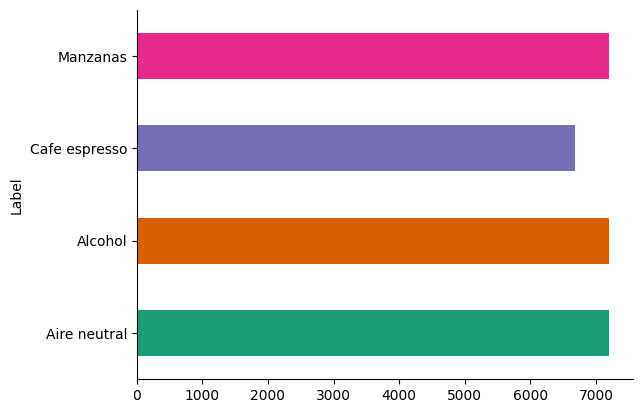

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('Label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

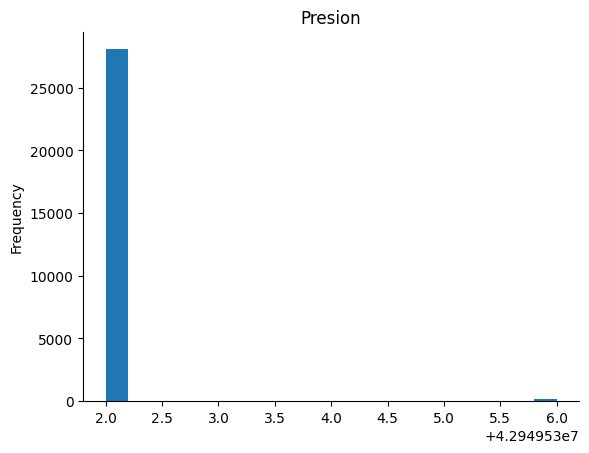

In [ ]:
from matplotlib import pyplot as plt
data['Presion'].plot(kind='hist', bins=20, title='Presion')
plt.gca().spines[['top', 'right',]].set_visible(False)

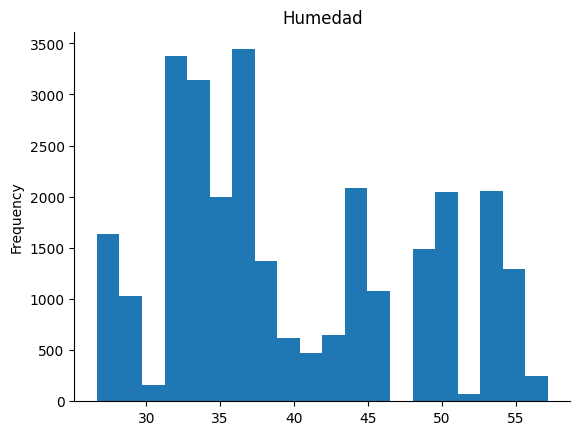

In [ ]:
from matplotlib import pyplot as plt
data['Humedad'].plot(kind='hist', bins=20, title='Humedad')
plt.gca().spines[['top', 'right',]].set_visible(False)

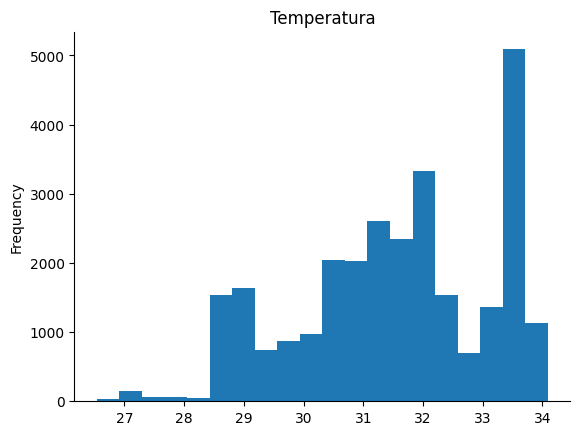

In [ ]:
from matplotlib import pyplot as plt
data['Temperatura'].plot(kind='hist', bins=20, title='Temperatura')
plt.gca().spines[['top', 'right',]].set_visible(False)

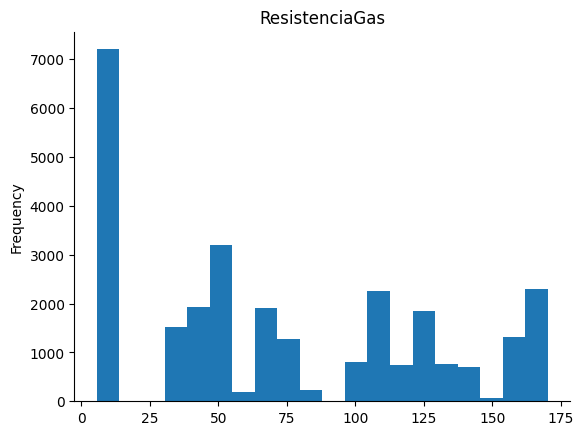

In [ ]:
from matplotlib import pyplot as plt
data['ResistenciaGas'].plot(kind='hist', bins=20, title='ResistenciaGas')
plt.gca().spines[['top', 'right',]].set_visible(False)

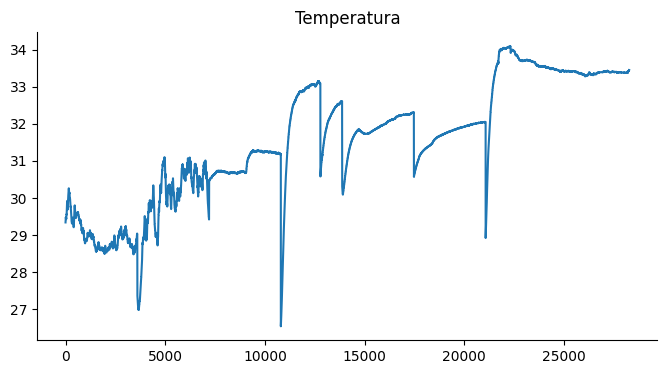

In [ ]:
from matplotlib import pyplot as plt
data['Temperatura'].plot(kind='line', figsize=(8, 4), title='Temperatura')
plt.gca().spines[['top', 'right']].set_visible(False)

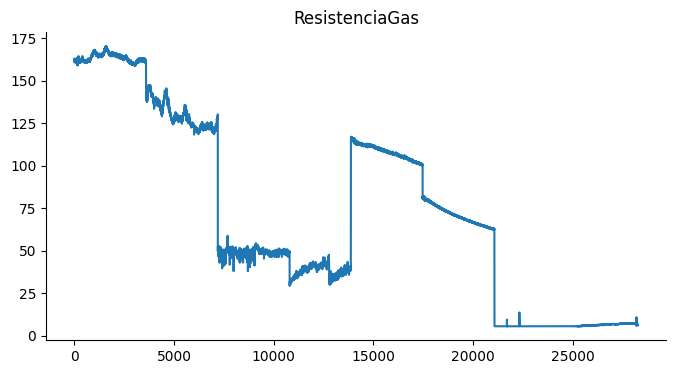

In [ ]:
from matplotlib import pyplot as plt
data['ResistenciaGas'].plot(kind='line', figsize=(8, 4), title='ResistenciaGas')
plt.gca().spines[['top', 'right']].set_visible(False)

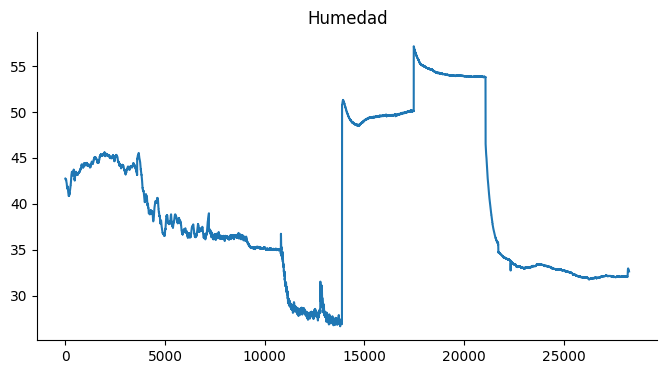

In [ ]:
from matplotlib import pyplot as plt
data['Humedad'].plot(kind='line', figsize=(8, 4), title='Humedad')
plt.gca().spines[['top', 'right']].set_visible(False)

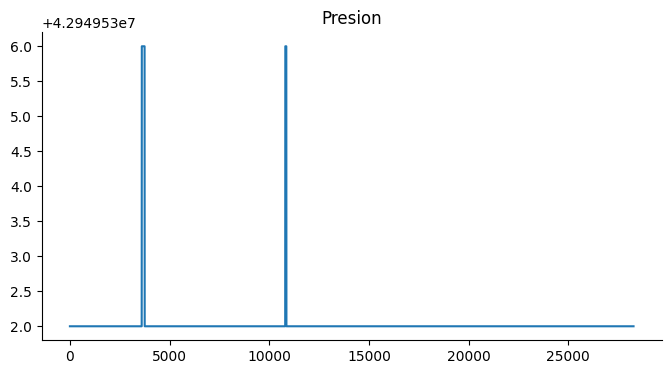

In [ ]:
from matplotlib import pyplot as plt
data['Presion'].plot(kind='line', figsize=(8, 4), title='Presion')
plt.gca().spines[['top', 'right']].set_visible(False)

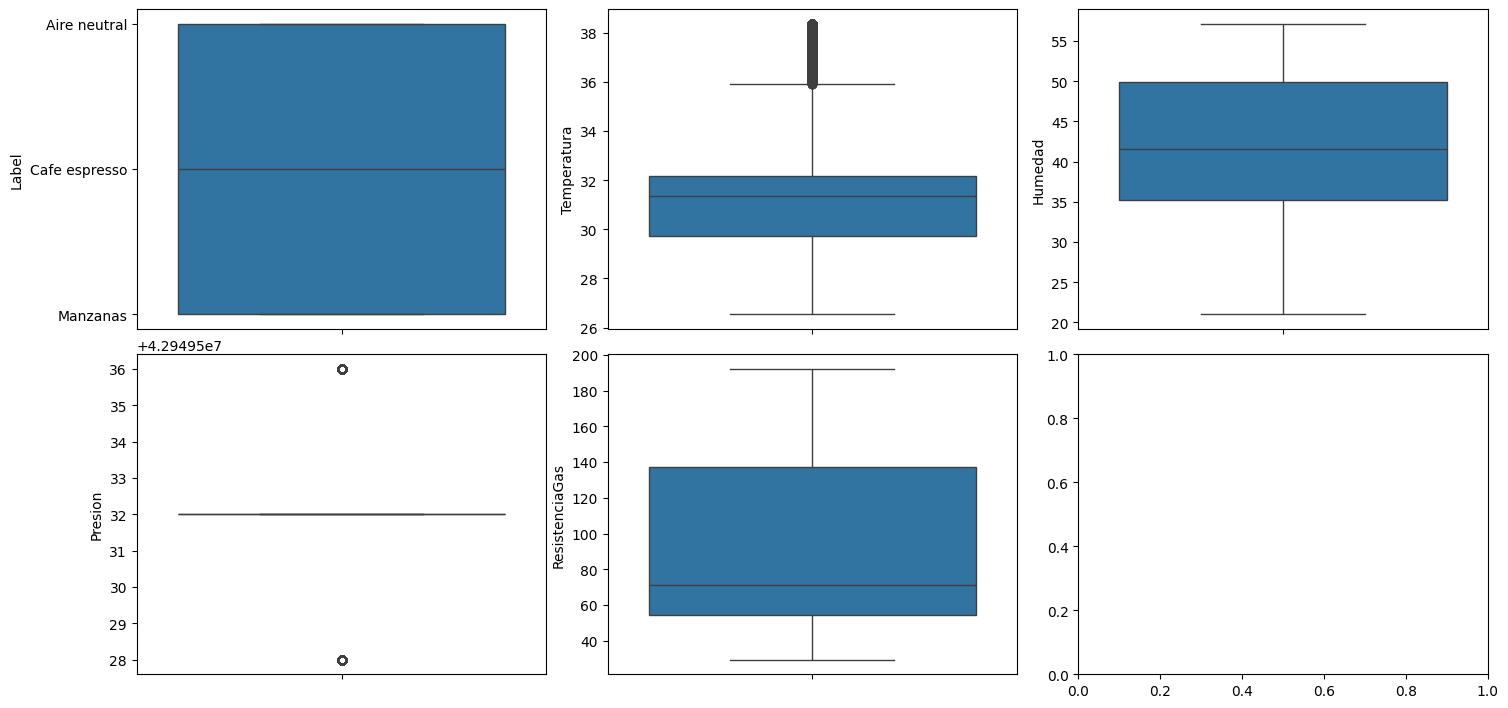

In [ ]:
# Trazar gráficos de caja para ver si hay valores atípicos en nuestros datos (considerando los datos entre el percentil 25 y el 75 como no atípicos).
import matplotlib.pyplot as plt
fig, ax = plt.subplots(ncols=3,nrows=2, figsize=(15, 7))
ax = ax.flatten()
index = 0
for i in data.columns:
  sns.boxplot(y=i, data=data, ax=ax[index])
  index +=1
plt.tight_layout(pad=0.4)
plt.show()

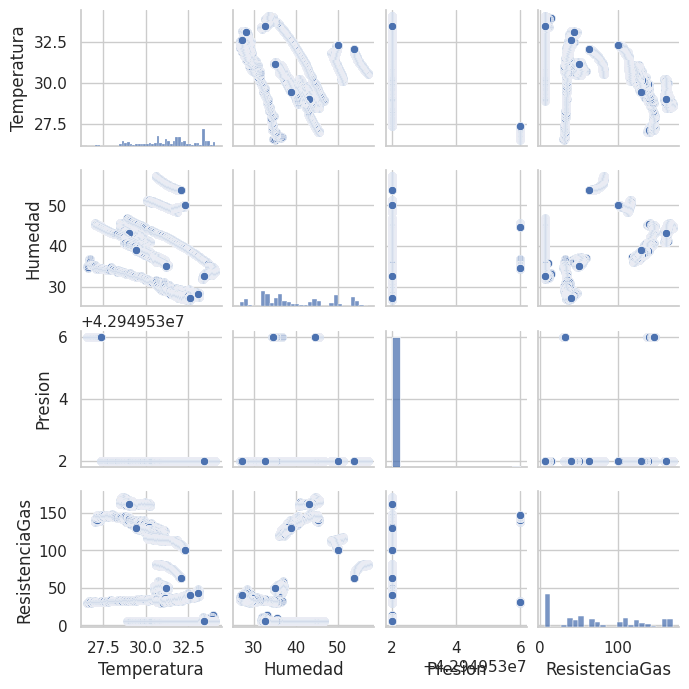

In [ ]:

# Configuramos la apariencia de los graficos
sns.set(style='whitegrid', context='notebook')

# Seleccionamos los features que mas nos interesa para ver la correlacion entre las variables
cols = ["Temperatura", "Humedad", "Presion", "ResistenciaGas"]

# Graficamos con un pairplot las variables de interes para ver sus relaciones
sns.pairplot(data[cols], height=1.75);

<Axes: >

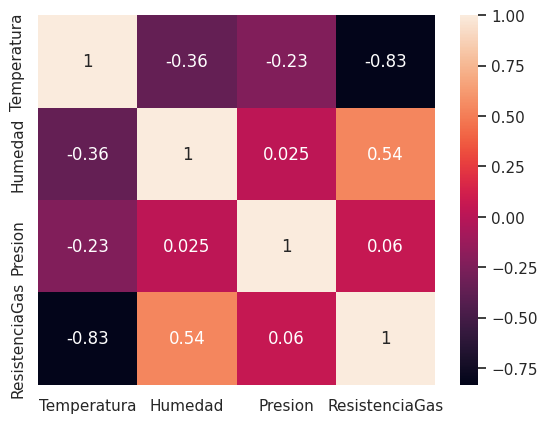

In [ ]:
# Ver correlación entre las variables

sns.heatmap(
    data=data[cols].corr(),
    cbar=True, annot=True, yticklabels=cols, xticklabels=cols)

In [ ]:
# Eliminación de la variable 'Presion' de la BD
data = data.drop(['Presion'], axis=1)
data.head()

,Label,Temperatura,Humedad,ResistenciaGas
0,Aire neutral,29.34,42.75,162.95
1,Aire neutral,29.35,42.75,162.49
2,Aire neutral,29.38,42.76,161.26
3,Aire neutral,29.39,42.76,162.02
4,Aire neutral,29.40,42.74,161.87


In [ ]:
# Generar una copia del DataFrame original
New_DB = data.copy()


In [ ]:
New_DB.head()


,Label,Temperatura,Humedad,ResistenciaGas
0,Aire neutral,29.34,42.75,162.95
1,Aire neutral,29.35,42.75,162.49
2,Aire neutral,29.38,42.76,161.26
3,Aire neutral,29.39,42.76,162.02
4,Aire neutral,29.40,42.74,161.87


## Verificar qué versión de sklear se tiene en colab (generalmente la 1.2) , y verificar cuál se tiene en nuestro equipo. Si la de nuestro equipo es la más reciente (1.5), actualizarla aquí en colab y reiniciar el entorno

In [ ]:
import sklearn
print(sklearn.__version__)

1.2.2


In [ ]:
!pip install --upgrade scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 47.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
import sklearn
print(sklearn.__version__)

1.2.2


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Codificar las etiquetas
label_encoder = LabelEncoder()
New_DB['Label'] = label_encoder.fit_transform(New_DB['Label'])

# Separar las características y la etiqueta
#X = New_DB[['Temperatura', 'Humedad', 'Presion', 'ResistenciaGas']]
X = New_DB[['Temperatura','Humedad', 'ResistenciaGas']]
y = New_DB['Label']


In [ ]:
from sklearn.model_selection import train_test_split


#X = New_DB[['Temperatura', 'Humedad', 'Presion', 'ResistenciaGas']]
X = New_DB[['Temperatura', 'Humedad', 'ResistenciaGas']]
y = New_DB['Label']

# Dividir los datos en conjuntos de entrenamiento+validación y prueba con estratificación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Dividir el conjunto de entrenamiento+validación en conjuntos de entrenamiento y validación con estratificación
#X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)



In [ ]:
print(X_train.info())
print(y_train.info())
#y_val

<class 'pandas.core.frame.DataFrame'>
Index: 19791 entries, 17845 to 23174
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperatura     19791 non-null  float64
 1   Humedad         19791 non-null  float64
 2   Presion         19791 non-null  float64
 3   ResistenciaGas  19791 non-null  float64
dtypes: float64(4)
memory usage: 773.1 KB
None
<class 'pandas.core.series.Series'>
Index: 19791 entries, 17845 to 23174
Series name: Label
Non-Null Count  Dtype
--------------  -----
19791 non-null  int64
dtypes: int64(1)
memory usage: 309.2 KB
None


In [ ]:
import pandas as pd

# Verificar la proporción de clases en los conjuntos de datos
print("Proporción en el conjunto de entrenamiento:")
print(pd.Series(y_train).value_counts(normalize=True))

#print("\nProporción en el conjunto de validación:")
#print(pd.Series(y_val).value_counts(normalize=True))

print("\nProporción en el conjunto de prueba:")
print(pd.Series(y_test).value_counts(normalize=True))


Proporción en el conjunto de entrenamiento:
Label
3    0.254661
1    0.254661
0    0.254661
2    0.236016
Name: proportion, dtype: float64

Proporción en el conjunto de prueba:
Label
1    0.254657
3    0.254657
0    0.254657
2    0.236029
Name: proportion, dtype: float64


In [ ]:
# Normalizar los datos
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#X_val = scaler.transform(X_val)

# Definir y entrenar clasificadores
classifiers = {
    'MLP': MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42),
    'Decision_Tree': DecisionTreeClassifier(random_state=42),
    'Random_Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='rbf', probability=True, random_state=42)
}

In [ ]:
# Entrenar y evaluar cada clasificador
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    #y_pred_val = clf.predict(X_val)
    y_pred_test = clf.predict(X_test)

    print(f'{name} Classifier (Prueba):')
    print('Accuracy:', accuracy_score(y_test, y_pred_test))
    print(classification_report(y_test, y_pred_test))
    print('-----------------------------------')

    #print(f'{name} Classifier (Prueba):')
    #print('Accuracy:', accuracy_score(y_test, y_pred_test))
    #print(classification_report(y_test, y_pred_test))
    #print('-----------------------------------')

MLP Classifier (Prueba):
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2160
           1       1.00      1.00      1.00      2160
           2       1.00      1.00      1.00      2002
           3       1.00      1.00      1.00      2160

    accuracy                           1.00      8482
   macro avg       1.00      1.00      1.00      8482
weighted avg       1.00      1.00      1.00      8482

-----------------------------------
Decision_Tree Classifier (Prueba):
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2160
           1       1.00      1.00      1.00      2160
           2       1.00      1.00      1.00      2002
           3       1.00      1.00      1.00      2160

    accuracy                           1.00      8482
   macro avg       1.00      1.00      1.00      8482
weighted avg       1.00      1.00      1.00      8482

------

In [ ]:
# Evaluar los clasificadores en el conjunto de prueba

for name, clf in classifiers.items():

    y_pred = clf.predict(X_test)
    print(f'{name} Classifier:')
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print('-----------------------------------')

MLP Classifier:
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2160
           1       1.00      1.00      1.00      2160
           2       1.00      1.00      1.00      2002
           3       1.00      1.00      1.00      2160

    accuracy                           1.00      8482
   macro avg       1.00      1.00      1.00      8482
weighted avg       1.00      1.00      1.00      8482

-----------------------------------
Decision_Tree Classifier:
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2160
           1       1.00      1.00      1.00      2160
           2       1.00      1.00      1.00      2002
           3       1.00      1.00      1.00      2160

    accuracy                           1.00      8482
   macro avg       1.00      1.00      1.00      8482
weighted avg       1.00      1.00      1.00      8482

------------------------

In [ ]:


# Transformación inversa de las predicciones en el conjunto de prueba
for name, clf in classifiers.items():

    y_pred = clf.predict(X_test)
    y_pred_label = label_encoder.inverse_transform(y_test)
    print(f'{name} Classifier:')
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print(classification_report(label_encoder.inverse_transform(y_test), y_pred_label))
    print('-----------------------------------')



MLP Classifier:
Accuracy: 1.0
               precision    recall  f1-score   support

 Aire neutral       1.00      1.00      1.00      2160
      Alcohol       1.00      1.00      1.00      2160
Cafe espresso       1.00      1.00      1.00      2002
     Manzanas       1.00      1.00      1.00      2160

     accuracy                           1.00      8482
    macro avg       1.00      1.00      1.00      8482
 weighted avg       1.00      1.00      1.00      8482

-----------------------------------
Decision_Tree Classifier:
Accuracy: 1.0
               precision    recall  f1-score   support

 Aire neutral       1.00      1.00      1.00      2160
      Alcohol       1.00      1.00      1.00      2160
Cafe espresso       1.00      1.00      1.00      2002
     Manzanas       1.00      1.00      1.00      2160

     accuracy                           1.00      8482
    macro avg       1.00      1.00      1.00      8482
 weighted avg       1.00      1.00      1.00      8482

--------

In [ ]:
# Nueva muestra
#nueva_muestra = [[30.7, 36.32, 42949532, 50.75]]
nueva_muestra = [[30.7, 36.32, 50.75]]

# Normalizar la nueva muestra
nueva_muestra = scaler.transform(nueva_muestra)

# Predecir la clase
prediccion = clf.predict(nueva_muestra)
prediccion_label = label_encoder.inverse_transform(prediccion)
print(f'La nueva muestra se clasifica como: {prediccion_label[0]}')

La nueva muestra se clasifica como: Cafe espresso


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## No es necesario ejecutar, son pruebas

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Codificar las etiquetas
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Definir y entrenar clasificadores
classifiers = {
    'MLP': MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42),
    'Decision_Tree': DecisionTreeClassifier(random_state=42),
    'Random_Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='rbf', probability=True, random_state=42)
}

# Entrenar y evaluar cada clasificador
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred_test = clf.predict(X_test)
    y_pred_proba_test = clf.predict_proba(X_test)

    print(f'{name} Classifier (Prueba):')
    print('Accuracy:', accuracy_score(y_test, y_pred_test))
    print(classification_report(y_test, y_pred_test))
    print('-----------------------------------')

# Nueva muestra
nueva_muestra = [[30.7, 36.32, 42949532, 50.75]]

# Normalizar la nueva muestra
nueva_muestra = scaler.transform(nueva_muestra)

# Predecir la clase y la probabilidad
for name, clf in classifiers.items():
    prediccion_proba = clf.predict_proba(nueva_muestra)
    max_proba = max(prediccion_proba[0])
    prediccion = clf.predict(nueva_muestra)
    prediccion_label = label_encoder.inverse_transform(prediccion)

    umbral = 0.5  # Puedes ajustar este umbral según sea necesario

    if max_proba < umbral:
        resultado = 'No se reconoce el aroma'
        exactitud = max_proba * 100
    else:
        resultado = prediccion_label[0]
        exactitud = max_proba * 100

    print(f'{name} Classifier:')
    print(f'La nueva muestra se clasifica como: {resultado}')
    print(f'Exactitud de la predicción: {exactitud:.2f}%')
    print('-----------------------------------')


MLP Classifier (Prueba):
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2160
           1       1.00      1.00      1.00      2160
           2       1.00      1.00      1.00      2002
           3       1.00      1.00      1.00      2160

    accuracy                           1.00      8482
   macro avg       1.00      1.00      1.00      8482
weighted avg       1.00      1.00      1.00      8482

-----------------------------------
Decision_Tree Classifier (Prueba):
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2160
           1       1.00      1.00      1.00      2160
           2       1.00      1.00      1.00      2002
           3       1.00      1.00      1.00      2160

    accuracy                           1.00      8482
   macro avg       1.00      1.00      1.00      8482
weighted avg       1.00      1.00      1.00      8482

------

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## Guardar los modelos entrenados en formato .pkl para ser utilizados en los scripts de python

In [ ]:
import joblib

# Guardar los clasificadores
for name, clf in classifiers.items():
    joblib.dump(clf, f'{name}_model.pkl')

# Guardar el scaler y el label encoder
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')


['label_encoder.pkl']